In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak on Windows with MKL*")

# Loading the dataset

In [2]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Dropping Labels to make it unsupervised

In [3]:
# Drop target for clustering (unsupervised learning)
df_clustering = df.drop('target', axis=1)

# Standardize the features

In [4]:
# Standardizing the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clustering)

# Using Elbow Method to find Optimal number of Clusters

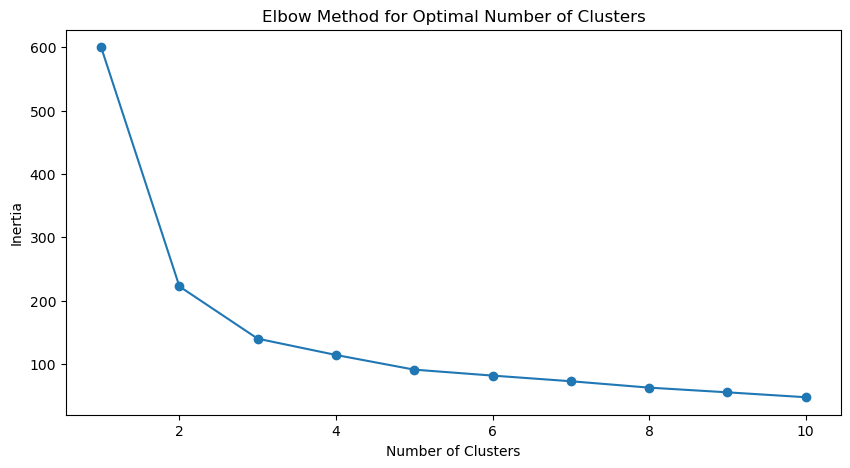

In [5]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42,n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

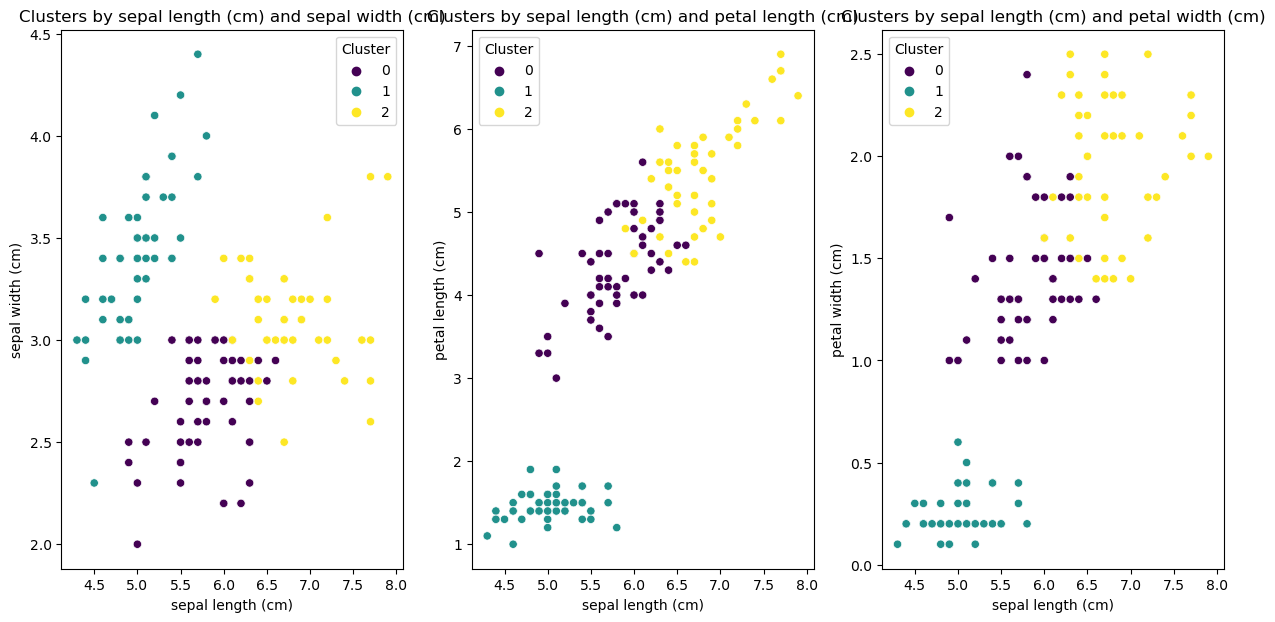

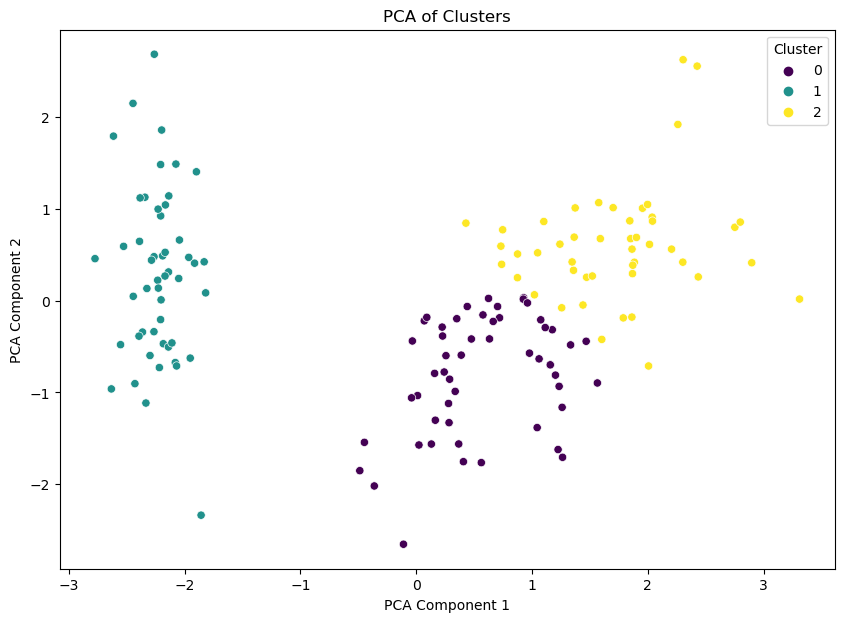

In [6]:
# Choose the optimal number of clusters based on the Elbow method
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42,n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue='Cluster', data=df, palette='viridis')
plt.title(f'Clusters by {iris.feature_names[0]} and {iris.feature_names[1]}')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[2]], hue='Cluster', data=df, palette='viridis')
plt.title(f'Clusters by {iris.feature_names[0]} and {iris.feature_names[2]}')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[3]], hue='Cluster', data=df, palette='viridis')
plt.title(f'Clusters by {iris.feature_names[0]} and {iris.feature_names[3]}')

plt.show()

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [7]:
# Calculate summary statistics for each cluster
cluster_summary = df.groupby('Cluster').mean()
# Count the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts()
# Combine the summary statistics and counts
cluster_summary['Customer Count'] = cluster_counts
cluster_summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Customer Count
Cluster,,,,,,
0,5.801887,2.673585,4.369811,1.413208,1.264151,53
1,5.006000,3.428000,1.462000,0.246000,0.000000,50
2,6.780851,3.095745,5.510638,1.972340,1.765957,47
